## Transforming Data With Pandas  

We'll work to answer the following question in this mission:
<br>
<br>
*Which of the factors above contribute the most to the happiness score?*
<br>
<br>
We need to manipulate our data into a format that makes it easier to analyze. We'll explore the following functions and methods to perform this task:
- Series.map()
- Series.apply()
- DataFrame.applymap()
- DataFrame.apply()
- pd.melt()

### Read the data 

In [6]:
import pandas as pd
happiness2015 = pd.read_csv("World_Happiness_2015.csv")
happiness2016 = pd.read_csv("World_Happiness_2016.csv")
happiness2017 = pd.read_csv("World_Happiness_2017.csv")

happiness2015['Year'] = 2015
happiness2016['Year'] = 2016
happiness2017['Year'] = 2017

### Rename the columns 

First is to use  DataFrame.rename() method to change the 'Economy (GDP per Capita)', 'Health (Life Expectancy)', and 'Trust (Government Corruption)' column names to the names specified in the mapping dictionary.

In [7]:
mapping = {'Economy (GDP per Capita)': 'Economy', 'Health (Life Expectancy)': 'Health', 'Trust (Government Corruption)': 'Trust' }

happiness2015 = happiness2015.rename(mapping, axis=1)
print(happiness2015.head())

       Country          Region  Happiness Rank  Happiness Score  \
0  Switzerland  Western Europe               1            7.587   
1      Iceland  Western Europe               2            7.561   
2      Denmark  Western Europe               3            7.527   
3       Norway  Western Europe               4            7.522   
4       Canada   North America               5            7.427   

   Standard Error  Economy   Family   Health  Freedom    Trust  Generosity  \
0         0.03411  1.39651  1.34951  0.94143  0.66557  0.41978     0.29678   
1         0.04884  1.30232  1.40223  0.94784  0.62877  0.14145     0.43630   
2         0.03328  1.32548  1.36058  0.87464  0.64938  0.48357     0.34139   
3         0.03880  1.45900  1.33095  0.88521  0.66973  0.36503     0.34699   
4         0.03553  1.32629  1.32261  0.90563  0.63297  0.32957     0.45811   

   Dystopia Residual  Year  
0            2.51738  2015  
1            2.70201  2015  
2            2.49204  2015  
3           

### Apply a function Element-wise using the map and apply method  

When we reviewed happiness2015 in the last screen, you may have noticed that each of the "factor" columns consists of numbers
<br>
<br>
However, not only is this definition a little hard to understand, but it can also be challenging to analyze all of these numbers across multiple columns. Instead, we can first convert these numbers to categories that indicate whether the factor has a high impact on the happiness score or a low impact with apply() function 
<br>
<br>
This function applies a function element-wise to a column. When we say element-wise, we mean that we pass the function one value in the series at a time and it performs some kind of transformation.

In [8]:
def label(element):
    if element > 1:
        return 'High'
    else:
        return 'Low'
    
economy_impact_apply = happiness2015['Economy'].apply(label)
print(economy_impact_apply.head()) 

0    High
1    High
2    High
3    High
4    High
Name: Economy, dtype: object


**Note that these methods don't modify the original series.** 
<br>
<br>
If we want to work with the new series in the original dataframe, we must either assign the results back to the original column or create a new column. 
<br>
<br>
One thing that differs the apply() and map() function is, apply function accepts another argument.
<br>For example,  take in another argument named x. If the element is greater than x, return 'High'. Otherwise, return 'Low'.

In [9]:
def label(element, x):
    if element > x:
        return 'High'
    else:
        return 'Low'
    
economy_impact_apply = happiness2015['Economy'].apply(label, x=.8)
print(economy_impact_apply.head()) 

0    High
1    High
2    High
3    High
4    High
Name: Economy, dtype: object


### Apply a function Element-wise to Multiple Columns using applymap method  

So far, we've transformed just one column at a time. If we wanted to transform more than one column, we could use the Series.map() or Series.apply() method to transform them.
<br>
<br>
However, it would be easier to just apply the same function to all of the factor columns (Economy, Health, Family, Freedom, Generosity, Trust) at once. Fortunately, however, pandas already has a method that can apply functions element-wise to multiple columns at once - the DataFrame.applymap()
<br>
<br>
Just like with the Series.map() and Series.apply() methods, we need to pass the function name into the df.applymap() method without parentheses.

In [10]:
def label(element):
    if element > 1:
        return 'High'
    else:
        return 'Low'

factors = ['Economy', 'Family', 'Health', 'Freedom', 'Trust', 'Generosity']
factors_impact = happiness2015[factors].applymap(label) 
print(factors_impact.head())

  Economy Family Health Freedom Trust Generosity
0    High   High    Low     Low   Low        Low
1    High   High    Low     Low   Low        Low
2    High   High    Low     Low   Low        Low
3    High   High    Low     Low   Low        Low
4    High   High    Low     Low   Low        Low


### Apply functions along an axis using the apply method 

Ww can also use the apply() method on a dataframe, but the DataFrame.apply() method has different capabilities. Instead of applying functions element-wise, the df.apply() method applies functions along an axis, either column-wise or row-wise. When we create a function to use with df.apply(), we set it up to accept a series, most commonly a column.
<br>
<br>
Let's use the df.apply() method to calculate the number of 'High' and 'Low' values in each column of the result from the last exercise, factors_impact. In order to do so, we'll apply the pd.value_counts function to all of the columns in the dataframe:

In [11]:
factors_impact.apply(pd.value_counts)

,Economy,Family,Health,Freedom,Trust,Generosity
High,66,89,2,NaN,NaN,NaN
Low,92,69,156,158.0,158.0,158.0


Now, we can easily see that the Family and Economy columns contain the most 'High' values!
<br>
<br>
When we applied the pd.value_counts function to factors_impact, it calculated the value counts for the first column, Economy, then the second column, Family, so on and so forth
<br>
<br>
Notice that we used the df.apply() method to transform multiple columns. This is only possible because the pd.value_counts function operates on a series. If we tried to use the df.apply() method to apply a function that works element-wise to multiple columns, we'd get an error

In [12]:
def v_counts(col):
    num = col.value_counts()
    den = col.size
    
    return num/den

v_counts_pct = factors_impact.apply(v_counts)
print(v_counts_pct.head())

       Economy    Family    Health  Freedom  Trust  Generosity
High  0.417722  0.563291  0.012658      NaN    NaN         NaN
Low   0.582278  0.436709  0.987342      1.0    1.0         1.0


In general, we should only use the apply() method when a vectorized function does not exist. Recall that pandas uses vectorization, the process of applying operations to whole series at once, to optimize performance. When we use the apply() method, we're actually looping through rows, so a vectorized method can perform an equivalent task faster than the apply() method.
<br>
<br>
Next, we'll compare two different ways of performing an analysis task. First, we'll use the df.apply() method to transform the data. Then, we'll look at an alternate way to perform the same task with vectorized methods.
<br>
<br>The factor columns is that the sum of the six factors and the Dystopia Residual column equals the happiness score
<br>Let's use the df.apply() method to convert each of the values in the six factor columns and the Dystopia Residual column to percentages.

In [13]:
factors = ['Economy', 'Family', 'Health', 'Freedom', 'Trust', 'Generosity', 'Dystopia Residual']

def percentages(col):
    div = col/happiness2015['Happiness Score']
    return div * 100

factor_percentages = happiness2015[factors].apply(percentages)
print(factor_percentages.head())

     Economy     Family     Health   Freedom     Trust  Generosity  \
0  18.406617  17.787136  12.408462  8.772506  5.532885    3.911691   
1  17.224177  18.545563  12.535908  8.315963  1.870784    5.770401   
2  17.609672  18.075993  11.620035  8.627342  6.424472    4.535539   
3  19.396437  17.694097  11.768280  8.903616  4.852832    4.613002   
4  17.857681  17.808132  12.193753  8.522553  4.437458    6.168170   

   Dystopia Residual  
0          33.180177  
1          35.736146  
2          33.108011  
3          32.774661  
4          33.011445  


## Reshaping Data with melt function 

It would be easier to convert these numbers into percentages, plot the results, and perform other data analysis tasks if we first reshaped the dataframe so that one column holds the values for all six factors and the Dystopia Residual column. We can accomplish this with the pd.melt() function.
<br>
<br>
**The pd.melt() aims to reshape the data and unpivots a DataFrame from wide format to long format.**
<br>melt() function is useful to massage a DataFrame into a format where one or more columns are identifier variables, while all other columns, considered measured variables, are unpivoted to the row axis, leaving just two non-identifier columns, variable and value.
<br>
<br>
Example is as follow:

In [14]:
happy_two = happiness2015[(happiness2015['Country'] == 'Switzerland')|(happiness2015['Country'] == 'Iceland')]
print(happy_two)

       Country          Region  Happiness Rank  Happiness Score  \
0  Switzerland  Western Europe               1            7.587   
1      Iceland  Western Europe               2            7.561   

   Standard Error  Economy   Family   Health  Freedom    Trust  Generosity  \
0         0.03411  1.39651  1.34951  0.94143  0.66557  0.41978     0.29678   
1         0.04884  1.30232  1.40223  0.94784  0.62877  0.14145     0.43630   

   Dystopia Residual  Year  
0            2.51738  2015  
1            2.70201  2015  


Below, we use the melt function to reshape happy_two so that the values for Economy, Family, and Health reside in the same column

In [15]:
pd.melt(happy_two, id_vars=['Country'], value_vars=['Economy', 'Family', 'Health'])

,Country,variable,value
0,Switzerland,Economy,1.39651
1,Iceland,Economy,1.30232
2,Switzerland,Family,1.34951
3,Iceland,Family,1.40223
4,Switzerland,Health,0.94143
5,Iceland,Health,0.94784


That is how we apply the changes into the original dataset 

In [16]:
main_cols = ['Country', 'Region', 'Happiness Rank', 'Happiness Score']
factors = ['Economy', 'Family', 'Health', 'Freedom', 'Trust', 'Generosity', 'Dystopia Residual']

melt = pd.melt(happiness2015, id_vars = main_cols, value_vars=factors)
melt['Percentage'] = round(melt['value']/melt['Happiness Score'] * 100, 2)
print(melt.head())

       Country          Region  Happiness Rank  Happiness Score variable  \
0  Switzerland  Western Europe               1            7.587  Economy   
1      Iceland  Western Europe               2            7.561  Economy   
2      Denmark  Western Europe               3            7.527  Economy   
3       Norway  Western Europe               4            7.522  Economy   
4       Canada   North America               5            7.427  Economy   

     value  Percentage  
0  1.39651       18.41  
1  1.30232       17.22  
2  1.32548       17.61  
3  1.45900       19.40  
4  1.32629       17.86  


Melt function can be used before the aggregation/pivot dunction and formulate the chart.
Example is as follows:

In [17]:
pv_melt = melt.pivot_table(index='variable', values='value')
print(pv_melt.head())

                      value
variable                   
Dystopia Residual  2.098977
Economy            0.846137
Family             0.991046
Freedom            0.428615
Generosity         0.237296


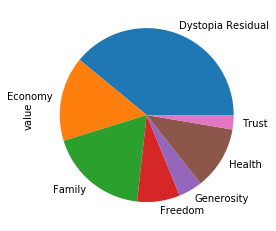

In [19]:
pv_melt.plot(kind='pie', y='value', legend=False);